In [46]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

filenames = glob.glob("./control/data/*.csv")
print(filenames)
files = [pd.read_csv(f, delimiter=";", converters=dict(opt_count=literal_eval)) for f in filenames] #,(?!\s)
files = [f.add_suffix(f"_{i}") for i, f in enumerate(files)] #.to_numpy().flatten()+np.random.uniform(0,200,977)
df = pd.concat(files, axis = 1) 
df.head()


['./control/data/halfcheetahseed3intfc1_lr_0.0003_intlr0.0001_piolr0.0001_k0.5_seed3.csv', './control/data/halfcheetahseed4intfc1_lr_0.0003_intlr0.0001_piolr0.0001_k0.5_seed4.csv', './control/data/halfcheetahseed5intfc1_lr_0.0003_intlr0.0001_piolr0.0001_k0.5_seed5.csv']


,epoch_0,avg_reward_0,num_opts_used_0,opt_duration_0,opt_count_0,epoch_1,avg_reward_1,num_opts_used_1,opt_duration_1,opt_count_1,epoch_2,avg_reward_2,num_opts_used_2,opt_duration_2,opt_count_2
0,1,-703.539862,4.074707,"[261.0, 211.0, 292.0, 292.0, 178.0, 248.0, 303...","[140, 109, 146, 145, 94, 134, 140, 140]",1,-617.717195,4.079102,"[345.0, 203.0, 370.0, 289.0, 206.0, 243.0, 177...","[165, 97, 155, 162, 108, 111, 110, 109]",1,-643.818122,3.973145,"[236.0, 269.0, 292.0, 204.0, 345.0, 203.0, 279...","[151, 147, 162, 110, 195, 118, 145, 110]"
1,2,-673.519789,3.769531,"[392.0, 249.0, 260.0, 289.0, 239.0, 161.0, 222...","[179, 122, 113, 113, 120, 94, 93, 109]",2,-611.723106,3.901367,"[228.0, 266.0, 261.0, 308.0, 207.0, 258.0, 290...","[117, 121, 116, 159, 89, 111, 133, 109]",2,-614.153658,4.055176,"[284.0, 235.0, 263.0, 259.0, 258.0, 277.0, 270...","[157, 131, 131, 112, 139, 132, 148, 97]"
2,3,-664.017650,3.793945,"[245.0, 497.0, 199.0, 214.0, 305.0, 144.0, 257...","[121, 243, 93, 96, 126, 78, 133, 93]",3,-588.628661,3.923340,"[156.0, 154.0, 250.0, 410.0, 256.0, 210.0, 340...","[96, 75, 110, 187, 104, 104, 156, 126]",3,-642.965855,4.168945,"[373.0, 212.0, 279.0, 239.0, 265.0, 236.0, 225...","[197, 115, 128, 108, 123, 139, 110, 109]"
3,4,-646.996044,3.921387,"[227.0, 430.0, 220.0, 149.0, 273.0, 151.0, 425...","[84, 187, 109, 79, 130, 79, 180, 93]",4,-583.470732,3.917969,"[184.0, 210.0, 227.0, 383.0, 265.0, 185.0, 375...","[100, 120, 92, 180, 141, 91, 152, 101]",4,-646.514914,3.924805,"[331.0, 291.0, 143.0, 336.0, 256.0, 132.0, 269...","[131, 185, 70, 156, 102, 76, 151, 167]"
4,5,-637.166316,3.869141,"[284.0, 236.0, 229.0, 228.0, 423.0, 172.0, 297...","[137, 133, 109, 126, 183, 95, 133, 91]",5,-593.641325,3.990234,"[265.0, 199.0, 232.0, 318.0, 293.0, 246.0, 298...","[137, 104, 114, 151, 138, 103, 163, 93]",5,-636.097848,4.004395,"[305.0, 140.0, 272.0, 331.0, 256.0, 252.0, 210...","[159, 76, 117, 160, 143, 145, 121, 149]"


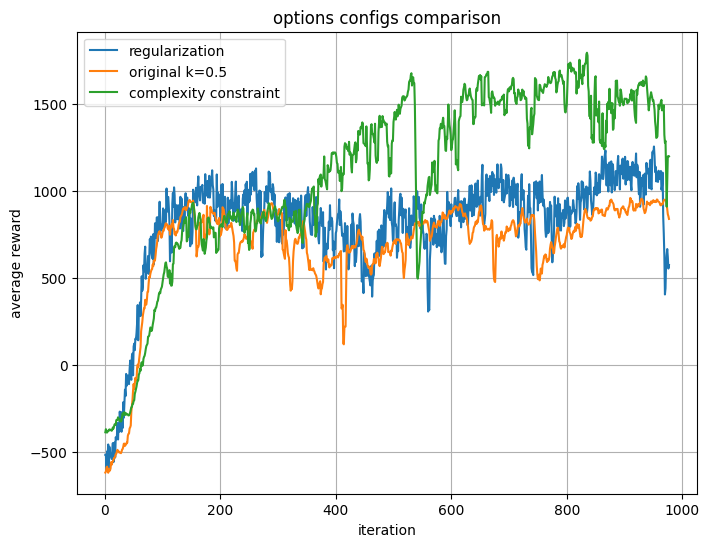

In [79]:
plt.figure(figsize=(8,6))

plt.plot(df[["epoch_0"]], df[["avg_reward_0"]], label="regularization")
plt.plot(df[["epoch_1"]], df[["avg_reward_1"]], label="original k=0.5")
plt.plot(df[["epoch_2"]], df[["avg_reward_2"]], label="complexity constraint")

plt.xlabel("iteration")
plt.ylabel("average reward")
plt.title("options configs comparison")
plt.legend()
plt.grid()
plt.show()

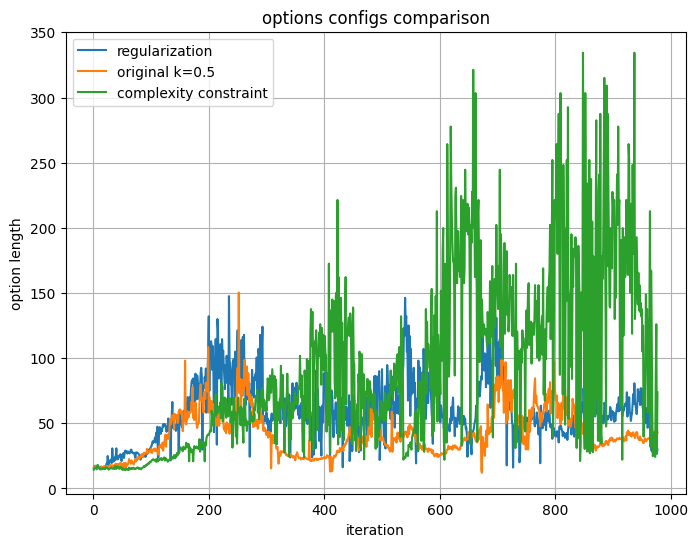

In [54]:
episode_duration = 2048
df["opt_count_0_mean"] = df['opt_count_0'].apply(np.mean)
df["opt_count_1_mean"] = df['opt_count_1'].apply(np.mean)
df["opt_count_2_mean"] = df['opt_count_2'].apply(np.mean)

plt.figure(figsize=(8,6))

plt.plot(df[["epoch_0"]], 2048/df[["opt_count_0_mean"]], label="regularization")
plt.plot(df[["epoch_1"]], 2048/df[["opt_count_1_mean"]], label="original k=0.5")
plt.plot(df[["epoch_2"]], 2048/df[["opt_count_2_mean"]], label="complexity constraint")

plt.xlabel("iteration")
plt.ylabel("option length")
plt.title("options configs comparison")
plt.legend()
plt.grid()
plt.show()

<Figure size 800x600 with 0 Axes>

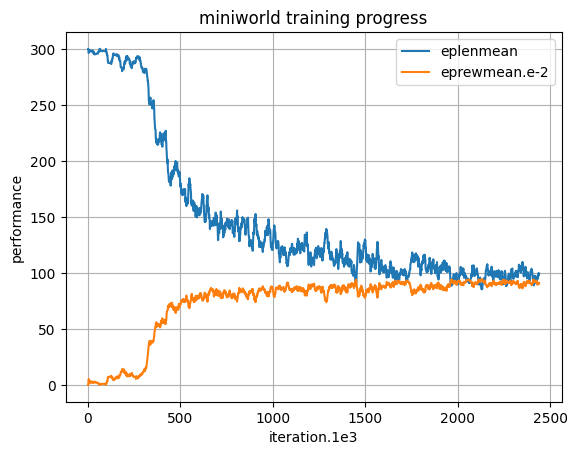

In [65]:
miniworld = pd.read_csv("./control/data/progress.csv")
miniworld["eprewmean.e-2"] = miniworld['eprewmean'].apply(lambda x: x*1e2)

plt.figure(figsize=(8,6))

miniworld.reset_index().plot(x="index", y=["eplenmean", "eprewmean.e-2"])

plt.xlabel("iteration.1e3")
plt.ylabel("performance")
plt.title("miniworld training progress")
plt.legend()
plt.grid()
plt.show()

<Figure size 800x600 with 0 Axes>

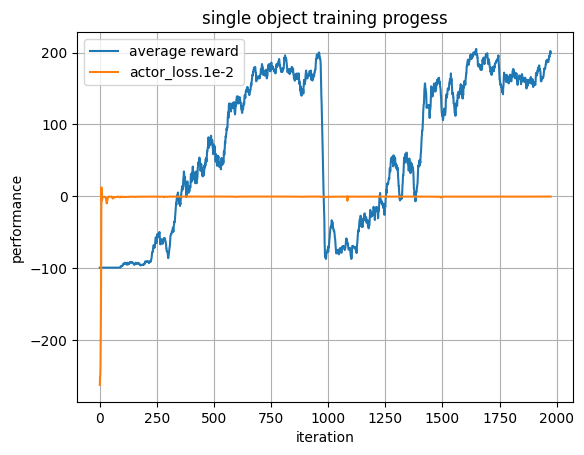

In [37]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

data1 = pd.read_csv("./data/1.csv", delimiter="|")
data1['index'] = data1.index
data2 = pd.read_csv("./data/2.csv", delimiter="|")
data2['index'] = data2.index

data = pd.merge(data1, data2, on='index', how='left')
data["Reward_y"] = data["Reward_y"].apply(lambda x: x*1e-2)


plt.figure(figsize=(8,6))
data.plot(x="index", y=["Reward_x", "Reward_y"], label=["average reward", "actor_loss.1e-2"])
plt.xlabel("iteration")
plt.ylabel("performance")
plt.title("single object training progess")
plt.legend()
plt.grid()
plt.show()

<Figure size 800x600 with 0 Axes>

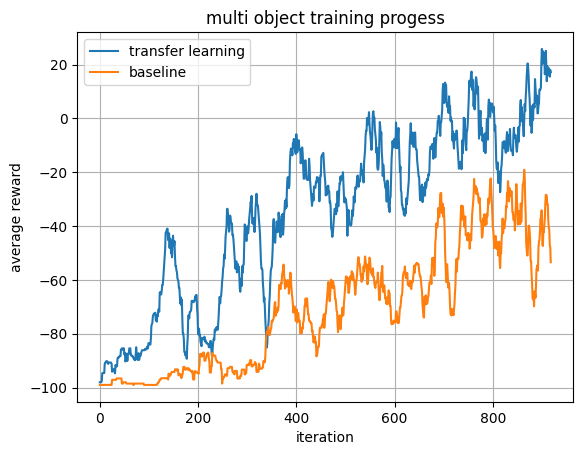

In [36]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

data3 = pd.read_csv("./data/3.csv", delimiter="|")
data3['index'] = data3.index
data4 = pd.read_csv("./data/4.csv", delimiter="|")
data4['index'] = data4.index

data = pd.merge(data3, data4, on='index', how='left')


plt.figure(figsize=(8,6))
data.plot(x="index", y=["Reward_x", "Reward_y"], label=["transfer learning", "baseline"])
plt.xlabel("iteration")
plt.ylabel("average reward")
plt.title("multi object training progess")
plt.legend()
plt.grid()
plt.show()